In [118]:
#! /usr/bin/env python

# Load useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io

In [119]:
# 1. Load data from a .mat
extreme = scipy.io.loadmat('./web/extreme_data.mat')

rain = extreme['rain']
rain2050 = extreme['rain2050']

snow = extreme['snow']
snow2050 = extreme['snow2050']

iloc = 0 # pick Toronto

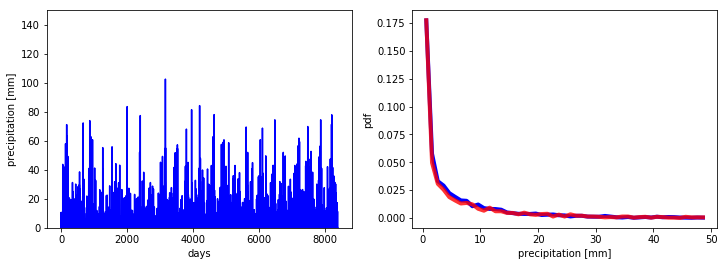

In [120]:
#1. plot the pdf

def normhistogram(u,bins):
    pdf, _ = np.histogram(u,bins)
    pdf = pdf / ((bins[2]-bins[1])*len(u))
    return pdf

bins = np.arange(0.1,50,1.)
pdf = normhistogram(rain[iloc],bins)
pdf2 = normhistogram(rain2050[iloc],bins)

plt.figure(figsize=(12.0,4.0))
plt.subplot(1,2,1)
plt.plot(rain[iloc],'-b');
plt.ylim([0, 150])
plt.ylabel('precipitation [mm]'); 
plt.xlabel('days');

plt.subplot(1,2,2)
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-b',linewidth=4.);
plt.plot(0.5*(bins[:-1]+bins[1:]),pdf2,'-r',linewidth=4.,alpha=0.8);
plt.ylabel('pdf'); 
plt.xlabel('precipitation [mm]'); 



In [121]:
print '################'
# variation of mean and std of rain precipitation
print 'mean rain change', np.round(100*(rain2050[iloc].mean() - rain[iloc].mean())/rain[iloc].mean(),2), '%'
print 'std rain change ',np.round(100*(rain2050[iloc].std() - rain[iloc].std())/rain[iloc].std(),2), '%'

# 3. variation of mean and std of snow precipitation
print '################'
print 'mean snow change', np.round(100*(snow2050[iloc].mean() - snow[iloc].mean())/snow[iloc].mean(),2), '%'
print 'std snow change ', np.round(100*(snow2050[iloc].std() - snow[iloc].std())/snow[iloc].std(),2), '%'
print '################'

################
mean rain change -2.72 %
std rain change  10.82 %
################
mean snow change -40.94 %
std snow change  -29.19 %
################


In [122]:
# 4. Precipitation indices for the historical period in Toronto
dayswithrain = np.sum(rain[iloc]>0.1)/(len(rain[iloc])/365.)
print 'days with rain     = ', dayswithrain

dayswithsnow = np.sum(snow[iloc]>0.1)/(len(snow[iloc])/365.)
print 'days with snow     = ', dayswithsnow

#compute 95th percentile
per95 = np.percentile(rain[iloc],95)
print '95th percentile is ', per95, 'mm'
heavypdays = np.sum(rain[iloc]>per95)/(len(rain[iloc])/365.)
print 'heavy precip. days = ', heavypdays

verywetdays = np.sum(rain[iloc]>20)/(len(rain[iloc])/365.)
print 'very wet days      = ', verywetdays

heavysnowdays = np.sum(snow[iloc]>5)/(len(snow[iloc])/365.)
print 'heavy snow days    = ', heavysnowdays

days with rain     =  177.6086956521739
days with snow     =  44.52173913043478
95th percentile is  16.911552429199247 mm
heavy precip. days =  18.26086956521739
very wet days      =  14.217391304347826
heavy snow days    =  3.9565217391304346


In [123]:
# 5. Precipitation indices for the future period in Toronto
dayswithrain2050 = np.sum(rain2050[iloc]>0.1)/(len(rain2050[iloc])/365.)
print 'days with rain     = ', np.round(dayswithrain2050,2)

dayswithsnow2050 = np.sum(snow2050[iloc]>0.1)/(len(snow2050[iloc])/365.)
print 'days with snow     = ', np.round(dayswithsnow2050,2)

#compute 95th percentile
per95 = np.percentile(rain2050[iloc],95)
print '95th percentile is ', per95, 'mm'
heavypdays2050 = np.sum(rain2050[iloc]>per95)/(len(rain2050[iloc])/365.)
print 'heavy precip. days = ', np.round(heavypdays2050,2)

verywetdays2050 = np.sum(rain2050[iloc]>20)/(len(rain2050[iloc])/365.)
print 'very wet days      = ', np.round(verywetdays2050,2)

heavysnowdays2050 = np.sum(snow2050[iloc]>5)/(len(snow2050[iloc])/365.)
print 'heavy snow days    = ', np.round(heavysnowdays2050,2)


days with rain     =  166.0
days with snow     =  31.09
95th percentile is  17.247132492065393 mm
heavy precip. days =  18.27
very wet days      =  14.64
heavy snow days    =  1.82


In [124]:
# 6. Variation
print ' '
print 'change days with rain     = ', np.round(100*(dayswithrain2050-dayswithrain)/dayswithrain,1), '%'
print 'change days with snow     = ', np.round(100*(dayswithsnow2050-dayswithsnow)/dayswithsnow,1), '%'
print 'change heavy precip. days = ', np.round(100*(heavypdays2050-heavypdays)/heavypdays,1), '%'
print 'change very wet days      = ', np.round(100*(verywetdays2050-verywetdays)/verywetdays,1), '%'
print 'change heavy snow days    = ', np.round(100*(heavysnowdays2050-heavysnowdays)/heavysnowdays,1), '%'


 
change days with rain     =  -6.5 %
change days with snow     =  -30.2 %
change heavy precip. days =  0.1 %
change very wet days      =  2.9 %
change heavy snow days    =  -54.0 %


# 3. Analysis of extreme precipitation events

In [136]:
genpareto.fit?


(0.21292793277861416, 5.004559992426087, 8.042879692180545)


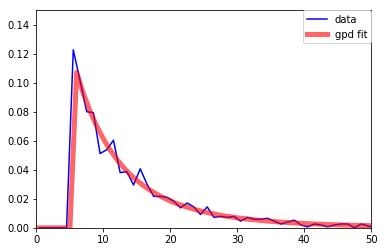

In [147]:
# 1. pdf for precipitation in Ottawa
# 2. pdf for the fitted gpd distribution

from scipy.stats import genpareto

iloc = 1;
threshold = 5
parfit =  genpareto.fit(rain[iloc][rain[iloc]>threshold],1, loc=0, scale=1)
print parfit

bins = np.arange(0.,250,1.)

# plot the data
fig = plt.figure(figsize=(6.0,4.0)); 
ax = plt.subplot(1,1,1)
pdf = normhistogram(rain[iloc][rain[iloc]>threshold],bins)
p1, = ax.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-b');
#ax.axis([0,50,0,0.2])

# plot the fitted gpd distribution
#ax = plt.subplot(1,2,2)
p2, =ax.plot(bins, genpareto.pdf(bins, parfit[0],parfit[1],parfit[2]),'r-', lw=5, alpha=0.6, label='pareto pdf');
#p3, =ax.plot(bins, genpareto.pdf(bins, 0,5,2),'y-', lw=5, alpha=0.6, label='pareto pdf');

ax.axis([0,50,0,0.15])
ax.legend([p1,p2],['data','gpd fit'],borderaxespad=0.)


/Users/gula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  


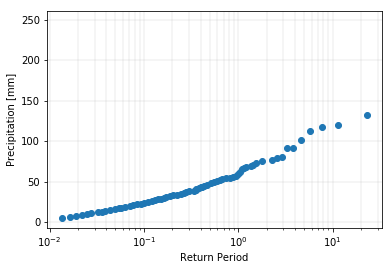

In [131]:
# 3. return period for precipitation in Ottawa


p = []
for exceed in range(threshold,250):
    p.append(len(rain[iloc])/np.sum(rain[iloc]>exceed)/365.)
    
time = np.arange(len(rain[iloc])/365.)

# remove duplicate points
for i in range(len(p)-1):
    if p[i+1]==p[i]: p[i] = np.nan

# plot figure
fig = plt.figure(figsize=(6.0,4.0)); ax = plt.subplot(1,1,1)
ax.plot(p,range(threshold,250),'o')
ax.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
ax.set_xscale('log')
ax.set_ylabel('Precipitation [mm]'); 
ax.set_xlabel('Return Period');


precipitation for the 100 yr return period is 192


/Users/gula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


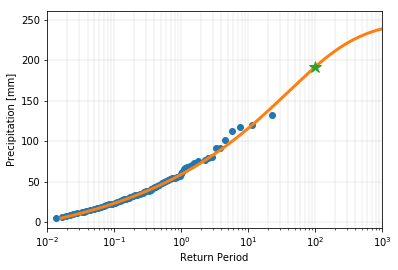

In [148]:
#4. return period for the fit
p_gpd = []

bins = np.arange(threshold,250)
gpd = genpareto.pdf(bins, parfit[0],parfit[1],parfit[2]) * np.sum(rain[iloc]>threshold)

for exceed in range(threshold,250):
    p_gpd.append(1./np.sum(gpd[bins>exceed])*len(rain[iloc])/365.)
    
# plot figure
fig = plt.figure(figsize=(6.0,4.0)); ax = plt.subplot(1,1,1)
ax.plot(p,bins,'o')
ax.plot(p_gpd,bins,'-',linewidth = 3.)
ax.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
ax.set_xscale('log')
ax.set_ylabel('Precipitation [mm]'); 
ax.set_xlabel('Return Period');
ax.set_xlim([0.01, 1000])

# plot 100 yr return period
p_gpd = np.array(p_gpd)
print 'precipitation for the 100 yr return period is', bins[np.min(np.where(p_gpd>100))]
ax.plot(p_gpd[np.min(np.where(p_gpd>100))], bins[np.min(np.where(p_gpd>100))],'*',markersize=12)



In [149]:
#90% confidence interval
m = 100 # nb of bootstrap samples
bins = np.arange(threshold,250)
x = rain[iloc][rain[iloc]>threshold]
n = len(x)

p_boot = np.zeros((bins.shape[0],m))

for iboot in range(m):
    boots = np.array([x[np.random.randint(n)] for i in range(n)])
    parfit =  genpareto.fit(boots[boots>threshold],1, loc=0, scale=1)
    print iboot,parfit
    #parfit =  genpareto.fit(boots,1, loc=0, scale=1)
    gpd0 = genpareto.pdf(bins, parfit[0],parfit[1],parfit[2]) * np.sum(boots>threshold)
    ib=-1
    for exceed in range(threshold,250):
        ib+=1
        p_boot[ib,iboot] = np.sum(gpd0[bins>exceed])


0 (0.19553280437585405, 5.004559993592915, 8.523467665254515)
1 (0.20937636318790187, 5.004559993633507, 8.400800688806827)
2 (0.10975542665415329, 5.004559988354359, 8.856247782888893)
3 (0.18019798891663708, 5.004559534552573, 8.168797337211323)
4 (0.7258465825003799, 5.010760783994472, 5.414341952739487)
5 (0.1990193583875967, 5.006200313229861, 8.330602213740129)
6 (0.0813324223342809, 4.901697831805757, 9.130358850686646)
7 (0.23177030413405025, 5.006200313484857, 7.765274208437895)
8 (0.2355638926103033, 5.004559993567751, 8.080337920641941)
9 (0.1695939309005623, 5.004557076034287, 8.506813244069122)
10 (0.18364926708027446, 5.00448608954691, 8.57915754278272)
11 (0.23607013665718546, 5.004559980003499, 7.858601981121165)
12 (0.17960575016059327, 5.004559993255603, 8.745347724101627)
13 (0.7031548217562438, 5.004559993535189, 6.8983670162197885)
14 (0.22910710492901548, 5.004549269389587, 7.924770417649854)
15 (1.0606257320843917, 5.004559992797857, 5.404271328521402)
16 (0.2480

In [150]:
#method 1
ci = np.zeros((3,len(bins)))
p_ci = np.zeros((3,len(bins)))

for ib in range(len(bins)):
    ci[0,ib] =  np.percentile(p_boot[ib,:],20)
    ci[1,ib] =  np.percentile(p_boot[ib,:],80)
    ci[2,ib] =  np.median(p_boot[ib,:])
    p_ci[:,ib] = 1./ci[:,ib]*len(rain[iloc])/365.
    
#method 2
#p_ci2 = np.zeros((3,len(bins)))
#for ib in range(len(bins)):
#    p_ci2[0,ib] =  np.percentile(1./p_boot[ib,:]*len(rain[iloc])/365.  ,15)
#    p_ci2[1,ib] =  np.percentile(1./p_boot[ib,:]*len(rain[iloc])/365.  ,85)
#    p_ci2[2,ib] =  np.median(1./p_boot[ib,:]*len(rain[iloc])/365.)

/Users/gula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


precipitation for the 100 yr return period is 192


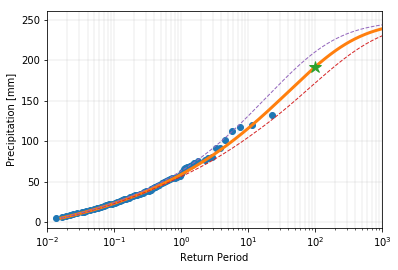

In [151]:

# plot figure
fig = plt.figure(figsize=(6.0,4.0)); ax = plt.subplot(1,1,1)
ax.plot(p,bins,'o')
ax.plot(p_gpd,bins,'-',linewidth = 3.)
'''
test = genpareto.pdf(bins, 0.01,parfit[1],parfit[2]) * np.sum(boots>threshold)
p_test = []
for exceed in range(threshold,250):
    p_test.append(1./np.sum(test[bins>exceed])*len(rain[iloc])/365.)

ax.plot(p_test,bins,'-',linewidth = 3.)
'''
ax.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
ax.set_xscale('log')
ax.set_ylabel('Precipitation [mm]'); 
ax.set_xlabel('Return Period');
ax.set_xlim([0.01, 1000])

# plot 100 yr return period
p_gpd = np.array(p_gpd)
print 'precipitation for the 100 yr return period is', bins[np.min(np.where(p_gpd>100))]
ax.plot(p_gpd[np.min(np.where(p_gpd>100))], bins[np.min(np.where(p_gpd>100))],'*',markersize=12)

ax.plot(p_ci[0,:],bins,'--',linewidth = 1.)
ax.plot(p_ci[1,:],bins,'--',linewidth = 1.)
#ax.plot(p_ci[2,:],bins,'-',linewidth = 2.)


/Users/gula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/Users/gula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


(0.01, 100)

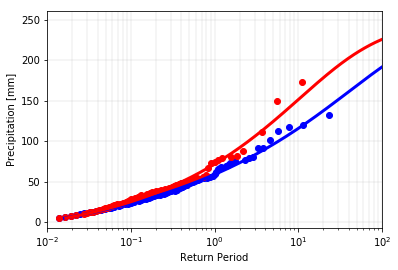

In [152]:
#7. return period for the fit

# data
threshold = 5
bins2050 = np.arange(threshold,250)
p2050 = []
for exceed in range(threshold,250):
    p2050.append(len(rain2050[iloc])/np.sum(rain2050[iloc]>exceed)/365.)

# remove duplicate points
for i in range(len(p2050)-1):
    if p2050[i+1]==p2050[i]: p2050[i] = np.nan

# fit
p_gpd2050 = []
parfit =  genpareto.fit(rain2050[iloc][rain2050[iloc]>threshold],1, loc=0, scale=1)
gpd = genpareto.pdf(bins, parfit[0],parfit[1],parfit[2]) * np.sum(rain2050[iloc]>threshold)

for exceed in range(threshold,250):
    p_gpd2050.append(1./np.sum(gpd[bins>exceed])*len(rain2050[iloc])/365.)
    
    
# plot figure
fig = plt.figure(figsize=(6.0,4.0)); ax = plt.subplot(1,1,1)
ax.plot(p,bins,'ob')
ax.plot(p2050,bins2050,'or')
ax.plot(p_gpd,bins,'-b',linewidth = 3.)
ax.plot(p_gpd2050,bins2050,'-r',linewidth = 3.)
ax.grid(b=True, which='both', color='0.65',linestyle='-',linewidth=0.2)
ax.set_xscale('log')
ax.set_ylabel('Precipitation [mm]'); 
ax.set_xlabel('Return Period');
ax.set_xlim([0.01, 100])
